In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import pandas library for data manipulation
import pandas as pd

# --- Step 1: Loading the Dataset ---
# Define the path to your dataset.
# Make sure 'house_prices.csv' is in the same directory as your script,
# or provide the full path to the file.
file_path = '/kaggle/input/housing-price-prediction/Housing.csv'

try:
    data = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully!")
    print(f"Shape of the dataset: {data.shape}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is in the correct directory or provide the full path.")
    # It's good practice to exit or handle gracefully if the file isn't found
    exit()

# Display the first few rows to confirm loading
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset '/kaggle/input/housing-price-prediction/Housing.csv' loaded successfully!
Shape of the dataset: (545, 13)

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no         

In [10]:
print("\nDataFrame Information (data.info()):")
data.info()


DataFrame Information (data.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# 2.2 Display descriptive statistics for numerical columns
# This shows count, mean, std, min, max, and quartiles for numerical features.
print("\nDescriptive Statistics for Numerical Columns (data.describe()):")
print(data.describe())


Descriptive Statistics for Numerical Columns (data.describe()):
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [9]:
# 2.3 Display descriptive statistics for categorical columns (optional, but useful)
# Use 'include='object'' to describe object (string/categorical) columns.
print("\nDescriptive Statistics for Categorical Columns (data.describe(include='object')):")
print(data.describe(include='object'))


Descriptive Statistics for Categorical Columns (data.describe(include='object')):
       mainroad guestroom basement hotwaterheating airconditioning prefarea  \
count       545       545      545             545             545      545   
unique        2         2        2               2               2        2   
top         yes        no       no              no              no       no   
freq        468       448      354             520             373      417   

       furnishingstatus  
count               545  
unique                3  
top      semi-furnished  
freq                227  


In [6]:
missing_values_count = data.isnull().sum()

In [7]:
print(missing_values_count)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
# Assuming 'df' DataFrame is already loaded

print("\n--- Step 4: Identifying Numerical and Categorical Features ---")

# Define your target variable
target_variable = 'price' # Your target column name

# Separate features (X) from the target (y)
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Manually identify numerical features based on your sample data
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Manually identify categorical features based on your sample data
categorical_features = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea', 'furnishingstatus'
]

print(f"\nTarget Variable: '{target_variable}'")
print(f"Number of Numerical Features: {len(numerical_features)}")
print(f"Numerical Features: {numerical_features}")
print(f"\nNumber of Categorical Features: {len(categorical_features)}")
print(f"Categorical Features: {categorical_features}")

# Verify that all columns in X are accounted for
all_identified_features = set(numerical_features + categorical_features)
all_X_columns = set(X.columns)

if all_identified_features == all_X_columns:
    print("\nAll feature columns in X are successfully categorized.")
else:
    print("\nWarning: Mismatch in identified features vs. actual X columns. Please review.")
    print("Uncategorized X columns:", all_X_columns - all_identified_features)


--- Step 4: Identifying Numerical and Categorical Features ---

Target Variable: 'price'
Number of Numerical Features: 5
Numerical Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Number of Categorical Features: 7
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

All feature columns in X are successfully categorized.


In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assuming 'X', 'numerical_features', 'categorical_features' are defined from previous snippets.
# Specifically using the 'X' DataFrame that already has the target 'price' dropped.

print("\n--- Step 5: Handling Categorical Features (One-Hot Encoding) ---")

# Create a copy of X to perform transformations
X_processed_cat = X.copy()

# Identify binary categorical features ('yes'/'no' type) and multi-category features
binary_categorical_features = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'prefarea'
]
multi_value_categorical_features = [
    'furnishingstatus'
]

# 5.1 Handle 'yes'/'no' binary columns by mapping to 1/0
print("\nMpping binary 'yes'/'no' features to 1/0...")
for col in binary_categorical_features:
    if col in X_processed_cat.columns: # Check if column exists
        X_processed_cat[col] = X_processed_cat[col].map({'yes': 1, 'no': 0})
        print(f"  Mapped '{col}' to 1/0.")
    else:
        print(f"  Warning: Binary feature '{col}' not found in X_processed_cat.")


# 5.2 Handle multi-value categorical columns using One-Hot Encoding
if multi_value_categorical_features:
    print("\nApplying One-Hot Encoding to multi-value categorical features...")
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Fit and transform these specific columns
    encoded_features_array = encoder.fit_transform(X_processed_cat[multi_value_categorical_features])

    # Get the names of the new columns
    encoded_feature_names = encoder.get_feature_names_out(multi_value_categorical_features)

    # Create a DataFrame from the encoded features
    encoded_data = pd.DataFrame(encoded_features_array, columns=encoded_feature_names, index=X_processed_cat.index)

    # Drop the original multi-value categorical columns and concatenate the new encoded columns
    X_processed_cat = X_processed_cat.drop(columns=multi_value_categorical_features)
    X_processed_cat = pd.concat([X_processed_cat, encoded_data], axis=1)

    print(f"One-Hot Encoded features created: {list(encoded_feature_names)}")
else:
    print("No multi-value categorical features found for One-Hot Encoding.")


print(f"\nShape of X after handling categorical features: {X_processed_cat.shape}")
print("First 5 rows of X_processed_cat with processed categorical features:")
print(X_processed_cat.head())

# Update the list of numerical features, as now the binary categorical features are numerical
# and the one-hot encoded features are also numerical.
# We'll use this for the next scaling step.
current_numerical_features = X_processed_cat.columns.tolist()
# This list now implicitly includes original numericals, binary mapped, and one-hot encoded columns.


--- Step 5: Handling Categorical Features (One-Hot Encoding) ---

Mpping binary 'yes'/'no' features to 1/0...
  Mapped 'mainroad' to 1/0.
  Mapped 'guestroom' to 1/0.
  Mapped 'basement' to 1/0.
  Mapped 'hotwaterheating' to 1/0.
  Mapped 'airconditioning' to 1/0.
  Mapped 'prefarea' to 1/0.

Applying One-Hot Encoding to multi-value categorical features...
One-Hot Encoded features created: ['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

Shape of X after handling categorical features: (545, 14)
First 5 rows of X_processed_cat with processed categorical features:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4   

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming 'X_processed_cat' and 'current_numerical_features' are from the previous snippet.

print("\n--- Step 6: Handling Numerical Features (Scaling) ---")

if current_numerical_features: # This list now contains all numerical and transformed categorical features
    print(f"\nNumerical features to scale (all features now): {current_numerical_features[:5]}...")

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Apply StandardScaler to all features in X_processed_cat
    # fit_transform learns the mean and std from the data, then applies scaling
    X_scaled_array = scaler.fit_transform(X_processed_cat[current_numerical_features])

    # Convert the scaled NumPy array back to a DataFrame
    # Use the same column names and index for clarity
    X_final_processed = pd.DataFrame(X_scaled_array, columns=current_numerical_features, index=X_processed_cat.index)

    print("\nApplied StandardScaler to all features.")
    print(f"Shape of X after scaling: {X_final_processed.shape}")
    print("First 5 rows of X_final_processed (all features scaled):")
    print(X_final_processed.head())

else:
    print("No numerical features to scale.")
    X_final_processed = X_processed_cat.copy() # No change if nothing to scale


--- Step 6: Handling Numerical Features (Scaling) ---

Numerical features to scale (all features now): ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad']...

Applied StandardScaler to all features.
Shape of X after scaling: (545, 14)
First 5 rows of X_final_processed (all features scaled):
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1  1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2  2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3  1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4  1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  prefarea  \
0        -0.219265         1.472618  1.517692  1.804941   
1        -0.219265         1.472618  2.679409 -0.554035   
2        -0.219265        -0.679063  1.517692  1.804941   
3  

In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'X_final_processed' (your fully pre-processed features DataFrame)
# and 'y' (your target variable Series, defined in Snippet 4) are available.

print("\n--- Step 7: Splitting Data into Training and Testing Sets ---")

# Define your features (X) and target (y)
X = X_final_processed # Our pre-processed features
# y is already defined from Snippet 4: y = df[target_variable]

print(f"Shape of X (features) before split: {X.shape}")
print(f"Shape of y (target) before split: {y.shape}")

# Perform the train-test split
# test_size=0.2: 20% for testing, 80% for training
# random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nYour pre-processed data is now ready for model training!")


--- Step 7: Splitting Data into Training and Testing Sets ---
Shape of X (features) before split: (545, 14)
Shape of y (target) before split: (545,)

Data Split Complete:
X_train shape: (436, 14)
X_test shape: (109, 14)
y_train shape: (436,)
y_test shape: (109,)

Your pre-processed data is now ready for model training!


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # For sqrt for RMSE

# Assuming X_train, X_test, y_train, y_test are available from the previous train-test split snippet.

print("\n--- Step 8: Fitting a Linear Regression Model ---")

# 8.1 Initialize the Linear Regression model
# LinearRegression() creates an instance of the model.
# By default, it includes an intercept.
model = LinearRegression()
print("Linear Regression model initialized.")

# 8.2 Train the model on the training data
# The .fit() method learns the coefficients and intercept from your training features (X_train)
# and their corresponding target values (y_train).
print("Training the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# 8.3 Make predictions on the test set
# The .predict() method uses the trained model to make predictions on new, unseen data (X_test).
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions made.")

# 8.4 Evaluate the model's performance
# It's crucial to evaluate how well your model performs on the test set (unseen data).

print("\n--- Model Evaluation ---")

# Mean Squared Error (MSE):
# Measures the average of the squares of the errors—that is, the average squared difference
# between the estimated values and actual value. Lower is better.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE):
# The square root of the MSE. It's often preferred because it's in the same units as the target variable.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared (R2 Score):
# Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
# A higher R-squared value indicates a better fit (0 to 1). 1 means perfect prediction.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.2f}")

# 8.5 Inspect model coefficients and intercept
# These show the learned relationship between each feature and the target variable.
print("\n--- Model Coefficients and Intercept ---")
print("Model Intercept:", model.intercept_)

# Pair coefficients with their corresponding feature names for better understanding
feature_names = X_train.columns # Assuming X_train is a DataFrame and has column names
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

print("\nLinear Regression model fitting and evaluation complete!")


--- Step 8: Fitting a Linear Regression Model ---
Linear Regression model initialized.
Training the Linear Regression model...
Model training complete.
Making predictions on the test set...
Predictions made.

--- Model Evaluation ---
Mean Squared Error (MSE): 1754318687330.67
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R2 Score): 0.65

--- Model Coefficients and Intercept ---
Model Intercept: 4737518.175380118
Model Coefficients:
                            Feature    Coefficient
2                         bathrooms  549420.501241
0                              area  511615.563777
8                   airconditioning  367817.894916
3                           stories  353158.429856
10                         prefarea  267018.660812
9                           parking  193542.781675
6                          basement  186194.150506
7                   hotwaterheating  143233.206250
4                          mainroad  128151.921295
5                         guestroom   88590.2

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error
import numpy as np # For sqrt for RMSE
import pandas as pd # For DataFrame to display coefficients

# Assuming X_train, X_test, y_train, y_test are available from the previous train-test split snippet.

print("\n--- Step 8: Fitting a Linear Regression Model ---")

# 8.1 Initialize the Linear Regression model
model = LinearRegression()
print("Linear Regression model initialized.")

# 8.2 Train the model on the training data
print("Training the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# 8.3 Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions made.")

# 8.4 Evaluate the model's performance (including MAE)

print("\n--- Model Evaluation ---")

# Mean Absolute Error (MAE):
# Measures the average of the absolute differences between predictions and actual values.
# It's less sensitive to outliers than MSE. Lower is better.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE):
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE):
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared (R2 Score):
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.2f}")

# 8.5 Inspect model coefficients and intercept
print("\n--- Model Coefficients and Intercept ---")
print("Model Intercept:", model.intercept_)

# Pair coefficients with their corresponding feature names for better understanding
# Ensure X_train is a DataFrame for .columns to work, otherwise get feature names differently
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

print("\nLinear Regression model fitting and evaluation complete!")


--- Step 8: Fitting a Linear Regression Model ---
Linear Regression model initialized.
Training the Linear Regression model...
Model training complete.
Making predictions on the test set...
Predictions made.

--- Model Evaluation ---
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.67
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R2 Score): 0.65

--- Model Coefficients and Intercept ---
Model Intercept: 4737518.175380118
Model Coefficients:
                            Feature    Coefficient
2                         bathrooms  549420.501241
0                              area  511615.563777
8                   airconditioning  367817.894916
3                           stories  353158.429856
10                         prefarea  267018.660812
9                           parking  193542.781675
6                          basement  186194.150506
7                   hotwaterheating  143233.206250
4                          mainroad  128151.921295
5       


--- Step 8: Fitting a Linear Regression Model (for Plotting) ---

--- Model Evaluation (Recap) ---
Mean Absolute Error (MAE): 970043.40
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R2 Score): 0.65

--- Step 9: Plotting the Linear Regression Model ---


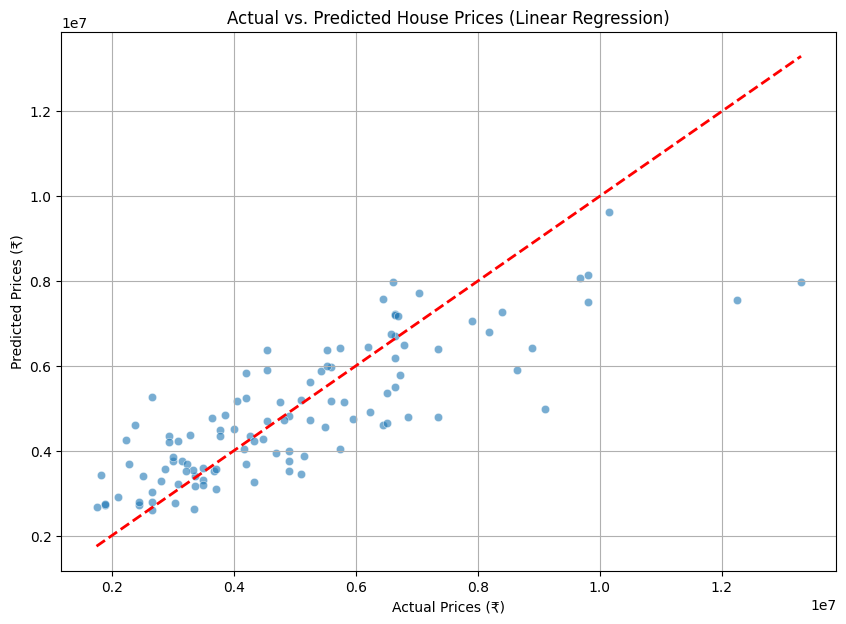


Interpretation of Actual vs. Predicted Plot:
- Points close to the red diagonal line indicate accurate predictions.
- Points far from the line indicate larger errors.
- Ideally, points should be scattered evenly around the line.
- A fan shape (wider spread at higher prices) might suggest heteroscedasticity (errors varying with the magnitude of the prediction), which could be addressed with transformations or different models.


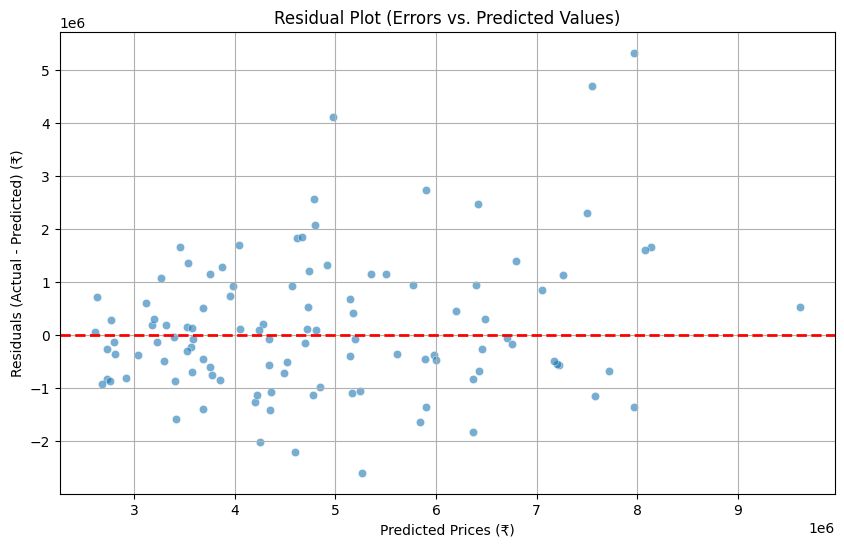

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


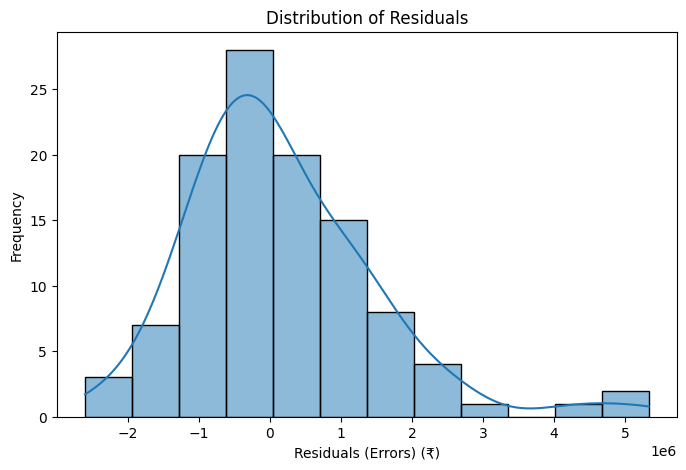


Interpretation of Residual Plot:
- Ideally, residuals should be randomly scattered around the zero line with no discernible pattern.
- A pattern (e.g., a curve, a funnel shape) suggests that the linear model is not capturing some underlying non-linear relationship or that there's heteroscedasticity.
- The histogram of residuals should ideally be normally distributed around zero. Skewness or multiple peaks suggest problems.

--- Step 10: Visualizing and Interpreting Coefficients ---

Model Coefficients (Sorted by Absolute Value):
                            Feature    Coefficient
2                         bathrooms  549420.501241
0                              area  511615.563777
8                   airconditioning  367817.894916
3                           stories  353158.429856
10                         prefarea  267018.660812
9                           parking  193542.781675
6                          basement  186194.150506
7                   hotwaterheating  143233.206250
4    

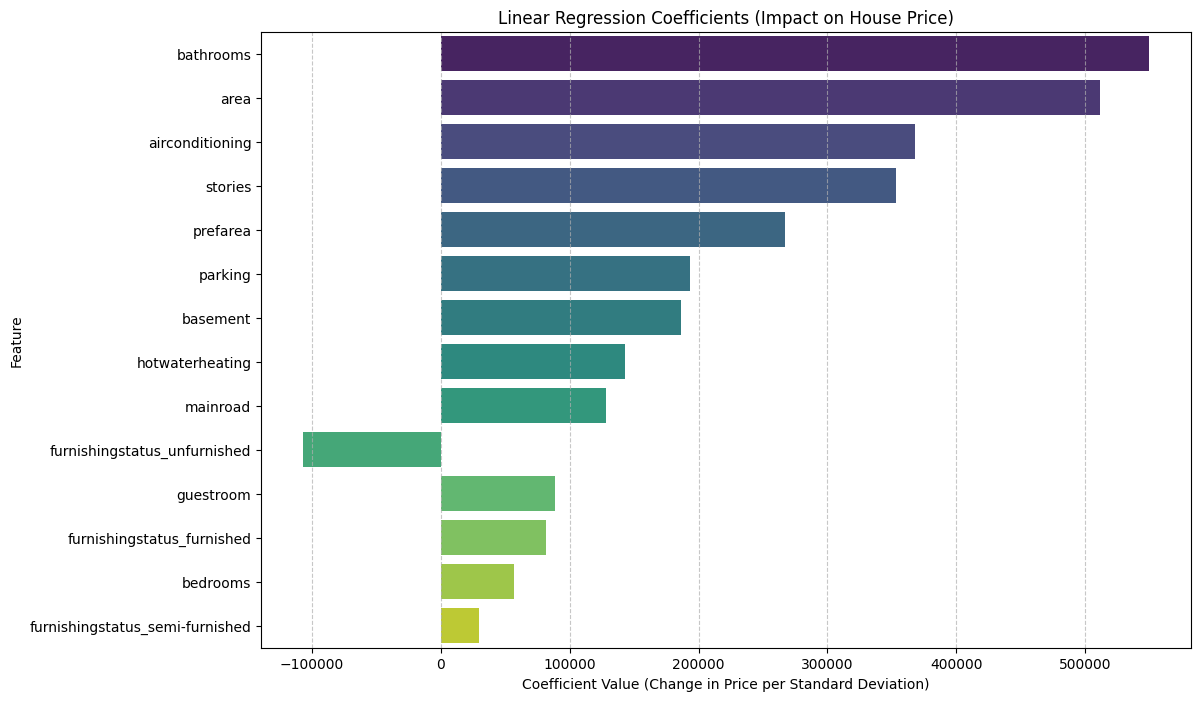


Interpretation of Coefficients Plot:
- The length of the bar indicates the magnitude of the coefficient (how much impact the feature has).
- Bars extending to the right (positive values) mean an increase in that feature's value (one standard deviation, due to scaling) is associated with an increase in house price.
- Bars extending to the left (negative values) mean an increase in that feature's value is associated with a decrease in house price.
- For scaled features (which all your numerical features are now), the coefficients indicate the relative importance/impact of each feature on the target variable.
  For example, 'bathrooms' having the largest positive bar means it has the strongest positive influence on price among your features, when all other features are held constant.
- Comparing 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', and 'furnishingstatus_unfurnished' reveals their relative impact compared to each other (and implicitly to a baseline if one was d

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- Assuming these variables are already defined from previous steps: ---
# X_train, X_test, y_train, y_test (pre-processed and split data)
# -------------------------------------------------------------------

print("\n--- Step 8: Fitting a Linear Regression Model (for Plotting) ---")

# 8.1 Initialize and Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8.2 Make predictions on the test set
y_pred = model.predict(X_test)

# 8.3 Evaluate the model (re-displaying for context)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation (Recap) ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# -----------------------------------------------------------------------------
print("\n--- Step 9: Plotting the Linear Regression Model ---")

# 9.1 Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6) # alpha for transparency in case of many overlapping points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual Prices (₹)")
plt.ylabel("Predicted Prices (₹)")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.grid(True)
plt.show()

# Interpretation of Actual vs. Predicted Plot:
print("\nInterpretation of Actual vs. Predicted Plot:")
print("- Points close to the red diagonal line indicate accurate predictions.")
print("- Points far from the line indicate larger errors.")
print("- Ideally, points should be scattered evenly around the line.")
print("- A fan shape (wider spread at higher prices) might suggest heteroscedasticity (errors varying with the magnitude of the prediction), which could be addressed with transformations or different models.")


# 9.2 Plotting Residuals (Errors)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero error line
plt.xlabel("Predicted Prices (₹)")
plt.ylabel("Residuals (Actual - Predicted) (₹)")
plt.title("Residual Plot (Errors vs. Predicted Values)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True) # Histogram with Kernel Density Estimate
plt.xlabel("Residuals (Errors) (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Interpretation of Residual Plot:
print("\nInterpretation of Residual Plot:")
print("- Ideally, residuals should be randomly scattered around the zero line with no discernible pattern.")
print("- A pattern (e.g., a curve, a funnel shape) suggests that the linear model is not capturing some underlying non-linear relationship or that there's heteroscedasticity.")
print("- The histogram of residuals should ideally be normally distributed around zero. Skewness or multiple peaks suggest problems.")


# -----------------------------------------------------------------------------
print("\n--- Step 10: Visualizing and Interpreting Coefficients ---")

# 10.1 Prepare Coefficients for Plotting
# Ensure X_train is a DataFrame for .columns to work, otherwise use a list of default names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

coefficients_data = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# Sort coefficients by their absolute value to see the most impactful features
coefficients_data['Abs_Coefficient'] = np.abs(coefficients_data['Coefficient'])
coefficients_data_sorted = coefficients_data.sort_values(by='Abs_Coefficient', ascending=False)

print("\nModel Coefficients (Sorted by Absolute Value):")
print(coefficients_data_sorted[['Feature', 'Coefficient']])

# 10.2 Plotting Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_data_sorted, palette='viridis')
plt.xlabel("Coefficient Value (Change in Price per Standard Deviation)")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients (Impact on House Price)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Interpretation of Coefficients Plot:
print("\nInterpretation of Coefficients Plot:")
print("- The length of the bar indicates the magnitude of the coefficient (how much impact the feature has).")
print("- Bars extending to the right (positive values) mean an increase in that feature's value (one standard deviation, due to scaling) is associated with an increase in house price.")
print("- Bars extending to the left (negative values) mean an increase in that feature's value is associated with a decrease in house price.")
print("- For scaled features (which all your numerical features are now), the coefficients indicate the relative importance/impact of each feature on the target variable.")
print("  For example, 'bathrooms' having the largest positive bar means it has the strongest positive influence on price among your features, when all other features are held constant.")
print("- Comparing 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', and 'furnishingstatus_unfurnished' reveals their relative impact compared to each other (and implicitly to a baseline if one was dropped during one-hot encoding).")

By combining these plots with our evaluation metrics, you get a much richer understanding of your Linear Regression model's strengths, weaknesses, and how individual features contribute to house price predictions.